In [1]:
# First, let's install the necessary libraries
!pip install nltk spacy textblob

In [2]:
# Import required libraries
import nltk
import spacy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Download spaCy English model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# 1. Basic Text Processing
print("1. Basic Text Processing")
text = "Natural Language Processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language."


1. Basic Text Processing


In [6]:
# Tokenization
tokens = nltk.word_tokenize(text)
print("Tokens:", tokens, "...")

Tokens: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', '.'] ...


In [7]:
# Part-of-speech tagging
pos_tags = nltk.pos_tag(tokens)
print("POS Tags:", pos_tags[:10], "...")

POS Tags: [('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('subfield', 'NN'), ('of', 'IN')] ...


In [9]:
# Lemmatization
lemmatizer = nltk.WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmas:", lemmas, "...")

Lemmas: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interaction', 'between', 'computer', 'and', 'human', 'language', '.'] ...


In [10]:
# 2. Named Entity Recognition using spaCy
print("\n2. Named Entity Recognition")
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")


2. Named Entity Recognition
NLP - ORG


In [11]:
# 3. Sentiment Analysis using TextBlob
print("\n3. Sentiment Analysis")
sentences = [
    "I love natural language processing!",
    "This course is very challenging.",
    "The algorithms are complex but interesting."
]

for sentence in sentences:
    blob = TextBlob(sentence)
    sentiment = blob.sentiment.polarity
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment:.2f}")


3. Sentiment Analysis
Sentence: I love natural language processing!
Sentiment: 0.31
Sentence: This course is very challenging.
Sentiment: 0.65
Sentence: The algorithms are complex but interesting.
Sentiment: 0.10


In [12]:
# 4. Word Frequency Analysis
print("\n4. Word Frequency Analysis")
from nltk.probability import FreqDist

fdist = FreqDist(tokens)
top_words = fdist.most_common(10)
print("Top 10 most frequent words:", top_words)



4. Word Frequency Analysis
Top 10 most frequent words: [(',', 2), ('and', 2), ('Natural', 1), ('Language', 1), ('Processing', 1), ('(', 1), ('NLP', 1), (')', 1), ('is', 1), ('a', 1)]


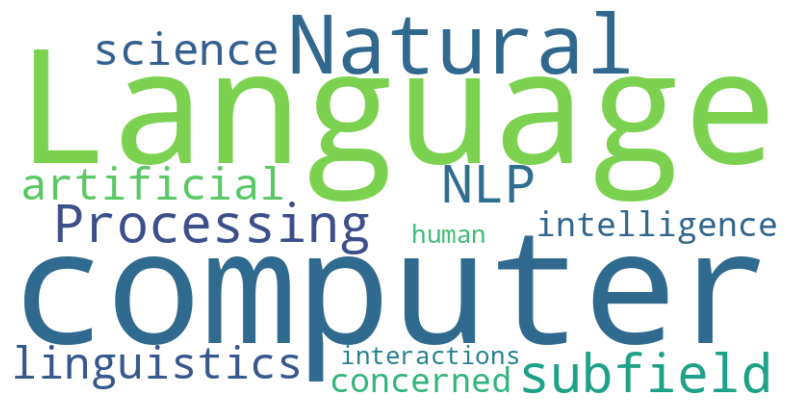

In [13]:
# prompt: word cloud visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tokens' is your list of words from the text processing part
# (you may need to remove stop words and punctuation first for better results)

text_for_wordcloud = " ".join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Frequency Analysis (Visualization)


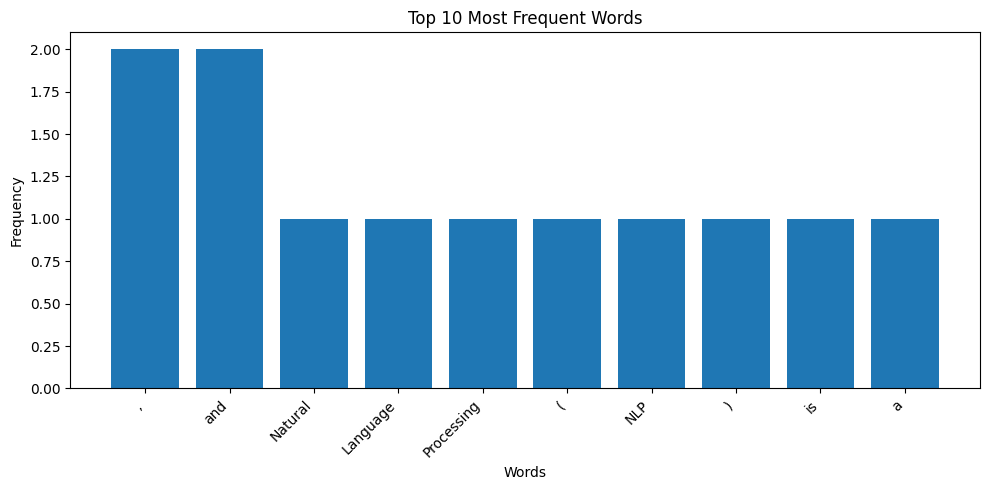

In [14]:
# prompt: visualize word frequency

# 4. Word Frequency Analysis (Visualization)
print("\nWord Frequency Analysis (Visualization)")

# Create a bar chart of the most frequent words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_words))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [15]:
# 5. Simple Text Classification (Naive Bayes)
print("\n5. Simple Text Classification")
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')


5. Simple Text Classification


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [16]:
# Prepare the data
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Define features
def document_features(document):
    document_words = set(document)
    features = {}
    for word in fdist.keys():
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [17]:
# Prepare feature sets
featuresets = [(document_features(d), c) for (d, c) in documents]

In [22]:
# Split the data
train_set, test_set = featuresets[100:], featuresets[:100]

In [23]:
# Train the classifier
classifier = NaiveBayesClassifier.train(train_set)

# Test the classifier
accuracy = nltk.classify.accuracy(classifier, test_set)
print(f"Naive Bayes Classifier Accuracy: {accuracy:.2f}")

Naive Bayes Classifier Accuracy: 0.56


In [24]:
# Show most informative features
print("Most Informative Features:")
classifier.show_most_informative_features(5)


Most Informative Features:
Most Informative Features
     contains(computers) = True              pos : neg    =      3.0 : 1.0
     contains(concerned) = True              pos : neg    =      1.9 : 1.0
             contains(,) = False             neg : pos    =      1.9 : 1.0
      contains(language) = True              pos : neg    =      1.8 : 1.0
  contains(interactions) = True              pos : neg    =      1.6 : 1.0
